## Import all necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
data = pd.read_csv('El-Nino.csv', sep = '\t')

In [4]:
data.head()

,Season,JJA,JAS,ASO,SON,OND,NDJ,DJF,JFM,FMA,MAM,AMJ,MJJ
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


### Replace all column names by overwritting on it

In [5]:
cols = ['Year','Janauary','February','March','April','May','June','July','August','September','October','November','December']

In [6]:
data.columns = cols

In [7]:
data.head(10)

,Year,Janauary,February,March,April,May,June,July,August,September,October,November,December
0,1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1,1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
2,1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
3,1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
4,1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7
5,1955,-0.7,-0.7,-1.1,-1.4,-1.7,-1.5,-1.1,-0.8,-0.6,-0.5,-0.5,-0.5
6,1956,-0.6,-0.6,-0.5,-0.4,-0.4,-0.4,-0.2,0.1,0.4,0.7,0.9,1.1
7,1957,1.3,1.3,1.3,1.4,1.5,1.7,1.8,1.7,1.3,0.9,0.7,0.6
8,1958,0.6,0.4,0.4,0.4,0.5,0.6,0.6,0.6,0.5,0.3,0.2,-0.1
9,1959,-0.2,-0.3,-0.1,0.0,0.0,0.0,-0.1,-0.1,-0.1,0.0,0.0,0.0


### Set Index as Year

In [8]:
data.set_index('Year', inplace = True)
data.head()

,Janauary,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
1950,-0.5,-0.4,-0.4,-0.4,-0.6,-0.8,-0.8,-0.5,-0.2,0.2,0.4,0.6
1951,0.7,0.9,1.0,1.2,1.0,0.8,0.5,0.4,0.3,0.3,0.2,0.0
1952,-0.1,0.0,0.2,0.1,0.0,0.1,0.4,0.6,0.6,0.7,0.8,0.8
1953,0.7,0.7,0.8,0.8,0.8,0.8,0.8,0.5,0.0,-0.4,-0.5,-0.5
1954,-0.6,-0.8,-0.9,-0.8,-0.7,-0.7,-0.7,-0.6,-0.7,-0.8,-0.8,-0.7


### Do transpose to know, how many years are present

In [9]:
data1 = data.transpose()
data1

Year,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Janauary,-0.5,0.7,-0.1,0.7,-0.6,-0.7,-0.6,1.3,0.6,-0.2,...,-0.4,0.5,-1.0,-0.5,0.3,-0.4,0.1,1.5,-0.3,0.2
February,-0.4,0.9,0.0,0.7,-0.8,-0.7,-0.6,1.3,0.4,-0.3,...,-0.3,0.5,-1.4,-0.7,0.3,-0.4,0.0,1.8,-0.6,-0.1
March,-0.4,1.0,0.2,0.8,-0.9,-1.1,-0.5,1.3,0.4,-0.1,...,-0.3,0.7,-1.6,-0.9,0.3,-0.3,0.2,2.1,-0.7,-0.4
April,-0.4,1.2,0.1,0.8,-0.8,-1.4,-0.4,1.4,0.4,0.0,...,-0.4,1.0,-1.7,-1.1,0.2,-0.2,0.4,2.4,-0.7,-0.7
May,-0.6,1.0,0.0,0.8,-0.7,-1.7,-0.4,1.5,0.5,0.0,...,-0.6,1.3,-1.7,-1.1,0.0,-0.2,0.6,2.5,-0.7,-0.9
June,-0.8,0.8,0.1,0.8,-0.7,-1.5,-0.4,1.7,0.6,0.0,...,-0.7,1.6,-1.6,-1.0,-0.2,-0.3,0.7,2.6,-0.6,-1.0
July,-0.8,0.5,0.4,0.8,-0.7,-1.1,-0.2,1.8,0.6,-0.1,...,-0.8,1.5,-1.4,-0.8,-0.4,-0.4,0.6,2.5,-0.3,-0.9
August,-0.5,0.4,0.6,0.5,-0.6,-0.8,0.1,1.7,0.6,-0.1,...,-0.7,1.3,-1.1,-0.6,-0.3,-0.4,0.6,2.2,-0.1,-0.8
September,-0.2,0.3,0.6,0.0,-0.7,-0.6,0.4,1.3,0.5,-0.1,...,-0.5,0.9,-0.8,-0.5,-0.2,-0.2,0.6,1.7,0.1,-0.6
October,0.2,0.3,0.7,-0.4,-0.8,-0.5,0.7,0.9,0.3,0.0,...,-0.2,0.4,-0.6,-0.4,-0.2,0.1,0.8,1.0,0.3,-0.4


### Generate the date_range series 

In [10]:
dates = pd.date_range(start = '1950-01', freq = 'MS', periods = len(data1.columns)*12)
dates

DatetimeIndex(['1950-01-01', '1950-02-01', '1950-03-01', '1950-04-01',
               '1950-05-01', '1950-06-01', '1950-07-01', '1950-08-01',
               '1950-09-01', '1950-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', length=816, freq='MS')

### Convert the dataframe into matrix 

In [11]:
data_np = data1.transpose().as_matrix()

In [12]:
shape = data_np.shape
shape

(68, 12)

In [13]:
data_np

array([[-0.5, -0.4, -0.4, -0.4, -0.6, -0.8, -0.8, -0.5, -0.2,  0.2,  0.4,
         0.6],
       [ 0.7,  0.9,  1. ,  1.2,  1. ,  0.8,  0.5,  0.4,  0.3,  0.3,  0.2,
         0. ],
       [-0.1,  0. ,  0.2,  0.1,  0. ,  0.1,  0.4,  0.6,  0.6,  0.7,  0.8,
         0.8],
       [ 0.7,  0.7,  0.8,  0.8,  0.8,  0.8,  0.8,  0.5,  0. , -0.4, -0.5,
        -0.5],
       [-0.6, -0.8, -0.9, -0.8, -0.7, -0.7, -0.7, -0.6, -0.7, -0.8, -0.8,
        -0.7],
       [-0.7, -0.7, -1.1, -1.4, -1.7, -1.5, -1.1, -0.8, -0.6, -0.5, -0.5,
        -0.5],
       [-0.6, -0.6, -0.5, -0.4, -0.4, -0.4, -0.2,  0.1,  0.4,  0.7,  0.9,
         1.1],
       [ 1.3,  1.3,  1.3,  1.4,  1.5,  1.7,  1.8,  1.7,  1.3,  0.9,  0.7,
         0.6],
       [ 0.6,  0.4,  0.4,  0.4,  0.5,  0.6,  0.6,  0.6,  0.5,  0.3,  0.2,
        -0.1],
       [-0.2, -0.3, -0.1,  0. ,  0. ,  0. , -0.1, -0.1, -0.1,  0. ,  0. ,
         0. ],
       [ 0.1,  0.2,  0.3,  0.2,  0.1,  0.1,  0. ,  0. ,  0. ,  0.1,  0.2,
         0.3],
       [ 0.1, -0.1, -

### Let's convert the matrix size of 68 x 12 into column vector 

In [14]:
data_np = data_np.reshape((shape[0] * shape[1], 1))

In [15]:
data_np.shape

(816, 1)

### Convert the data_np into dataframe
* Here we are merging two series data i.e data_np and dates series into dataframe.
* As this dataset belongs to timeseries concept, we apply dates series as index to our dataframe.

In [16]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)

In [17]:
df.head()

,Mean
1950-01-01,-0.5
1950-02-01,-0.4
1950-03-01,-0.4
1950-04-01,-0.4
1950-05-01,-0.6


### Now Let's plot how our data looks like

Text(0,0.5,'Mean across Month')

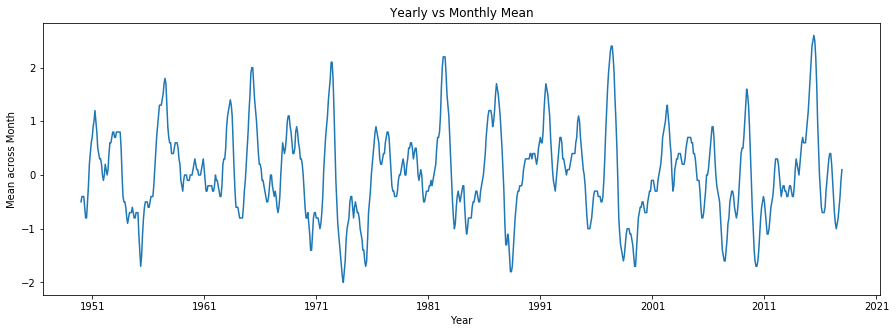

In [18]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('Yearly vs Monthly Mean')
plt.xlabel('Year')
plt.ylabel('Mean across Month')

In [19]:
dataset = df.values

In [20]:
dataset

array([[-0.5],
       [-0.4],
       [-0.4],
       [-0.4],
       [-0.6],
       [-0.8],
       [-0.8],
       [-0.5],
       [-0.2],
       [ 0.2],
       [ 0.4],
       [ 0.6],
       [ 0.7],
       [ 0.9],
       [ 1. ],
       [ 1.2],
       [ 1. ],
       [ 0.8],
       [ 0.5],
       [ 0.4],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0. ],
       [-0.1],
       [ 0. ],
       [ 0.2],
       [ 0.1],
       [ 0. ],
       [ 0.1],
       [ 0.4],
       [ 0.6],
       [ 0.6],
       [ 0.7],
       [ 0.8],
       [ 0.8],
       [ 0.7],
       [ 0.7],
       [ 0.8],
       [ 0.8],
       [ 0.8],
       [ 0.8],
       [ 0.8],
       [ 0.5],
       [ 0. ],
       [-0.4],
       [-0.5],
       [-0.5],
       [-0.6],
       [-0.8],
       [-0.9],
       [-0.8],
       [-0.7],
       [-0.7],
       [-0.7],
       [-0.6],
       [-0.7],
       [-0.8],
       [-0.8],
       [-0.7],
       [-0.7],
       [-0.7],
       [-1.1],
       [-1.4],
       [-1.7],
       [-1.5],
       [-1

In [21]:
dataset.shape

(816, 1)

### Here we are splitting the data into train and test set

In [22]:
train = dataset[0:696,:]
test = dataset[696:,:]

In [23]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (816, 1)
Train shape: (696, 1)
Test shape: (120, 1)


In [24]:
# Converting the data into MinMax Scaler because to avoid any outliers present in our dataset
scaler = MinMaxScaler(feature_range = (-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(816, 1)

### As we know we use LSTM model to our data then we follow Imporvements over RNN principle
* To see more inbrief Click [here](https://www.analyticsvidhya.com/blog/2017/12/fundamentals-of-deep-learning-introduction-to-lstm/)

In [25]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#x_train shape
x_train.shape

(636, 60)

In [27]:
#y_train shape
y_train.shape

(636,)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [29]:
x_train.shape

(636, 60, 1)

In [30]:
 # Creating and fitting the model

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

In [31]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)

Epoch 1/10
 - 43s - loss: 0.0184
Epoch 2/10
 - 41s - loss: 0.0043
Epoch 3/10
 - 39s - loss: 0.0027
Epoch 4/10
 - 39s - loss: 0.0016
Epoch 5/10
 - 39s - loss: 0.0012
Epoch 6/10
 - 40s - loss: 0.0011
Epoch 7/10
 - 39s - loss: 0.0010
Epoch 8/10
 - 40s - loss: 0.0010
Epoch 9/10
 - 39s - loss: 9.9598e-04
Epoch 10/10
 - 39s - loss: 0.0010


In [32]:
# Now Let's perform same operations that are done on train set
inputs = df[len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [33]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [34]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean = scaler.inverse_transform(Mean)

In [35]:
rms=np.sqrt(np.mean(np.power((test-Mean),2)))
rms

0.12548976093460587

Text(0.5,1,'Forecasting on Actual data')

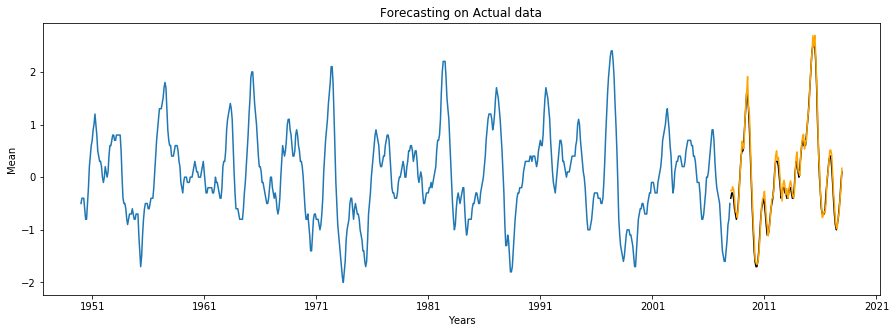

In [36]:
#plotting the train, test and forecast data
train = df[:696]
test = df[696:]
test['Predictions'] = Mean

plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')


In [39]:
trainpred = model.predict(X_test,steps=2)

In [40]:
trainpred.shape

(240, 1)

In [41]:
trainpred

array([[ 0.37914935],
       [ 0.37795314],
       [ 0.3948895 ],
       [ 0.38478971],
       [ 0.34743977],
       [ 0.29193851],
       [ 0.28910685],
       [ 0.26757696],
       [ 0.31364098],
       [ 0.37168011],
       [ 0.4494963 ],
       [ 0.51571214],
       [ 0.58334619],
       [ 0.5669207 ],
       [ 0.55334508],
       [ 0.65135419],
       [ 0.7306689 ],
       [ 0.7807672 ],
       [ 0.8502177 ],
       [ 0.72180867],
       [ 0.68711162],
       [ 0.57067287],
       [ 0.44491404],
       [ 0.35122523],
       [ 0.24760494],
       [ 0.17966144],
       [ 0.0987431 ],
       [ 0.08151002],
       [ 0.07423326],
       [ 0.08330931],
       [ 0.1147737 ],
       [ 0.16851056],
       [ 0.24522264],
       [ 0.31212085],
       [ 0.3420648 ],
       [ 0.35052672],
       [ 0.37650889],
       [ 0.32570812],
       [ 0.26890874],
       [ 0.23302111],
       [ 0.19211899],
       [ 0.21579073],
       [ 0.24934864],
       [ 0.30184147],
       [ 0.3449212 ],
       [ 0

In [42]:
test.head()

,Mean,Predictions
2008-01-01,-0.4,-0.255913
2008-02-01,-0.3,-0.261416
2008-03-01,-0.3,-0.183508
2008-04-01,-0.4,-0.229967
2008-05-01,-0.6,-0.401777


In [46]:
testScore = math.sqrt(mean_squared_error(test['Mean'], trainpred[:120,0]))*100
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 83.68 RMSE


In [51]:
# Now we will predict the next year values of monthly wise
# Here our test values are present upto 2017
a = trainpred[120:132]  # Our Test values are present upto 120 and now we are predicting next year values i.e 2018
a

array([[ 0.37914935],
       [ 0.37795314],
       [ 0.3948895 ],
       [ 0.38478971],
       [ 0.34743977],
       [ 0.29193851],
       [ 0.28910685],
       [ 0.26757696],
       [ 0.31364098],
       [ 0.37168011],
       [ 0.4494963 ],
       [ 0.51571214]], dtype=float32)

In [52]:
# Here we can check monthly wise weather condition
print(a[9][0])
if a[9][0] > 0.5:
    print('El-Nino')
elif a[9][0] < -0.5:
    print('La-Nina')
else:
    print('Moderate')

0.37168
Moderate


In [54]:
# Now we can also check year wise weather condition
b = trainpred[120:132].mean(axis = 0)
b

array([ 0.36528111], dtype=float32)

In [55]:
if b > 0.5:
    print('El-Nino')
elif b < -0.5:
    print('La-Nina')
else:
    print('Moderate')

Moderate
